## TRANSPORTS

plots transports through JDF in mol/m2/s, daily, figures in ./FLUX_plot

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
def make_nclen(start,end,ftype, sdir):
    date_ar = []
    sens_ar = []
    doy_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        date_ar.append(ddmmmyy)
        doy_ar.append(dddd)
    return date_ar, sens_ar, doy_ar

In [8]:
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

sdir_preind = '/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/'
sdir_br = '/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/'

dates_preind, files_preind, doy_preind = make_nclen(start,end,'dian_U', sdir_preind)
dates_br, files_br, doy_br = make_nclen(start,end,'dian_U', sdir_br)


1
365


In [10]:
t_testU_BR = nc.Dataset(files_br[0])
DIC_UT = t_testU_BR['DIC_UT']
DIC_UT_jdfmouth_BR = DIC_UT[:,:,:,20]
DIC_UT_jdfmouth2d_BR = np.squeeze(DIC_UT_jdfmouth_BR)


depth_bounds = t_testU_BR['depthu_bounds']
depth_cell = np.zeros(40)
depth_cell[:] = depth_bounds[:,1]-depth_bounds[:,0]
area_cells_all = np.zeros_like(DIC_UT_jdfmouth2d_BR)
area_cell = depth_cell*440
#     zlevels = physdat.variables['deptht']
for i in range(0,898):
    area_cells_all[:,i] = area_cell
zlevels = t_testU_BR.variables['depthu']


In [11]:
print(zlevels[:])

[  0.5000003   1.5000031   2.5000114   3.5000305   4.5000706   5.5001507
   6.5003104   7.500623    8.501236    9.502433   10.5047655  11.509312
  12.518167   13.535412   14.568982   15.634288   16.761173   18.007135
  19.481785   21.389978   24.100256   28.229916   34.685757   44.517723
  58.484333   76.58559    98.06296   121.866516  147.08946   173.11449
 199.57304   226.2603    253.06664   279.93454   306.8342    333.75018
 360.67453   387.6032    414.5341    441.4661   ]


150


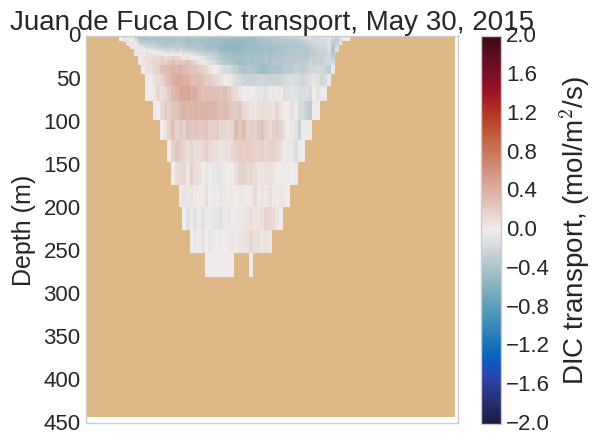

In [27]:
for d in range(150,151):#,len(doy_br)):
    if d % 10 == 0:
        print(d)
    doy = doy_br[d]
    tdate = dates_br[d]

    t_testU_BR = nc.Dataset(files_br[d])
    DIC_UT = t_testU_BR['DIC_UT']
    DIC_UT_jdfmouth_BR = DIC_UT[:,:,:,20]
    DIC_UT_jdfmouth2d_BR = np.squeeze(DIC_UT_jdfmouth_BR)
    DIC_mmol_m2_2_BR = DIC_UT_jdfmouth2d_BR/area_cells_all

    t_testU_PI = nc.Dataset(files_preind[d])
    DIC_UT = t_testU_PI['DIC_UT']
    DIC_UT_jdfmouth_PI = DIC_UT[:,:,:,20]
    DIC_UT_jdfmouth2d_PI = np.squeeze(DIC_UT_jdfmouth_PI)
    DIC_mmol_m2_2_PI = DIC_UT_jdfmouth2d_PI/area_cells_all


    fig = plt.figure(figsize=(6,5))
#     nop = 4
    #for i in range(1,nop+1):
#         print(i)
#         if i == 1:
    ax1 = fig.add_subplot(1,1,1)
    section_slice = np.arange(360, 460)
    sd = (DIC_mmol_m2_2_BR[:,360:460])/1000
    tplt = np.ma.masked_values(sd,0)
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = ax1.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-2, vmax=2 )
    cbar = fig.colorbar(mesh, ax=ax1)
    ax1.invert_yaxis()
    land_colour = 'burlywood'
    cmap.set_bad(land_colour)
    plt.title('Juan de Fuca DIC transport, May 30, 2015', fontsize = 20) 
    cbar.set_label('DIC transport, (mol/m$^2$/s)', fontsize = 20)
    #ax1.set_ylabel('depth (m)')
    cbar.ax.tick_params(labelsize=16) 
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xticklabels([])
    ax1.set_ylabel('Depth (m)', fontsize= 18)
    

#     #if i == 2:
#     ax2 = fig.add_subplot(1,3,2)
#     section_slice = np.arange(360, 460)
#     sd = (DIC_mmol_m2_2_PI[:,360:460])/1000
#     tplt = np.ma.masked_values(sd,0)
#     tcmap = cm.cm.balance
#     cmap = tcmap
#     mesh = ax2.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-2, vmax=2 )
#     cbar = fig.colorbar(mesh, ax=ax2)
#     ax2.invert_yaxis()
#     land_colour = 'burlywood'
#     cmap.set_bad(land_colour)
#     plt.title('DIC trans. JDF (mol/m2/s) - PI')  
#     ax2.set_yticklabels([])
#     ax2.set_xticklabels([])

    
#     ax3 = fig.add_subplot(1,3,3)
#     section_slice = np.arange(360, 460)
#     sd = (DIC_mmol_m2_2_PI[:,360:460]-DIC_mmol_m2_2_BR[:,360:460])/1000
#     tplt = np.ma.masked_values(sd,0)
#     tcmap = cm.cm.balance
#     cmap = tcmap
#     mesh = ax3.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-0.5, vmax=0.5 )
#     cbar = fig.colorbar(mesh, ax=ax3)
#     ax3.invert_yaxis()
#     land_colour = 'burlywood'
#     cmap.set_bad(land_colour)
#     plt.title('DIC trans. JDF (mol/m2/s) - PI')  
#     ax3.set_yticklabels([])
#     ax3.set_xticklabels([])
#         if i == 3:
#             ax = fig.add_subplot(1,3,i)
#             section_slice = np.arange(360, 460)
#             sd = (DIC_mmol_m2_2_BR[:,360:460] - DIC_mmol_m2_2_PI[:,360:460])/1000
#             tplt = np.ma.masked_values(sd,0)
#             tcmap = cm.cm.balance
#             cmap = tcmap
#             mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-1, vmax=1 )
#             cbar = fig.colorbar(mesh, ax=ax)
#             ax.invert_yaxis()
#             land_colour = 'slategrey'
#             cmap.set_bad(land_colour)
#             ax.set_yticklabels([])
#             ax.set_xticklabels([])
#             fig.suptitle(tdate + ' flux differences, DOY '+ doy, fontsize = 25) 

    plt.show()
        #plt.suptitle('YES', fontsize = 20)
        #fname = './FLUX_plot/JDFDIFF_2NDYR_' + doy +'.png'
        #fig.savefig(fname)
        #plt.close()

then run bash mov5.sh ./FLUX_plot/ FLUXDIFF_2NDYR_